In [2]:
from PIL import Image
import os

# 图像所在目录
directory_path = r"D:\s-casa-写论文\result图表\19个子图"
image_files = [f for f in os.listdir(directory_path) if f.endswith('.png') or f.endswith('.jpg')]

# 按文件名排序，确保图像是你想要的顺序
image_files.sort()

# 读取所有图像
images = [Image.open(os.path.join(directory_path, image_file)) for image_file in image_files]

# 获取单个图像的宽度和高度
width, height = images[0].size

# 创建一个新图像，其高度是所有图像的总和，宽度与单个图像相同
merged_image = Image.new("RGB", (width, height * len(images)))

# 将每个图像粘贴到新图像上
for index, image in enumerate(images):
    merged_image.paste(image, (0, index * height))

# 保存新图像
merged_image.save(os.path.join(directory_path, "merged_vertical_image.jpg"))

# 关闭所有图像，释放资源
for image in images:
    image.close()


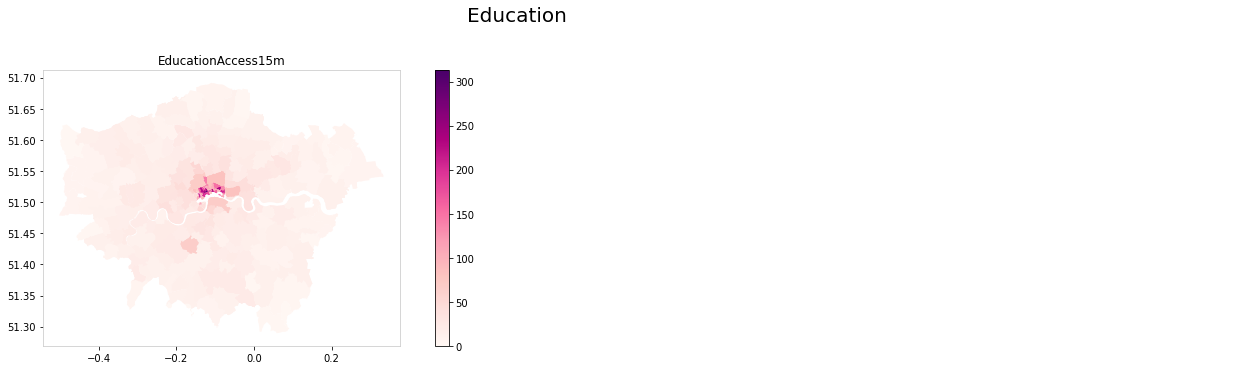

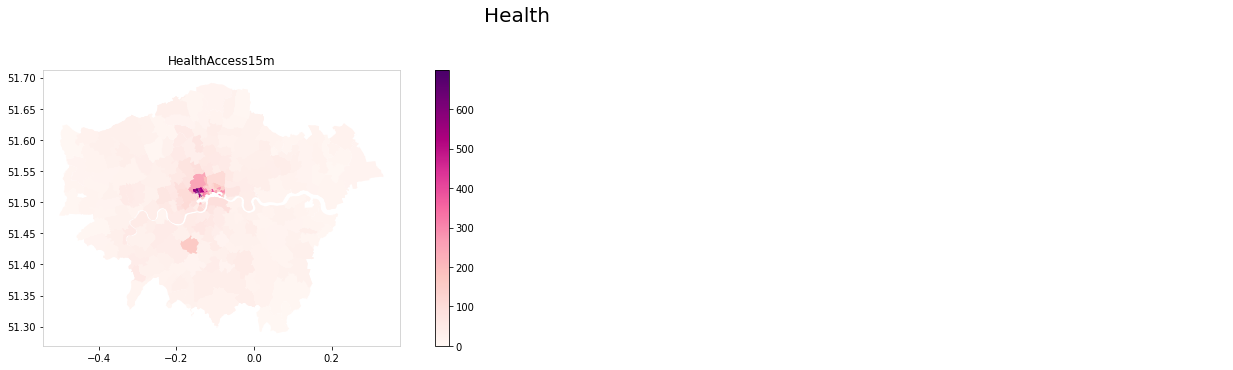

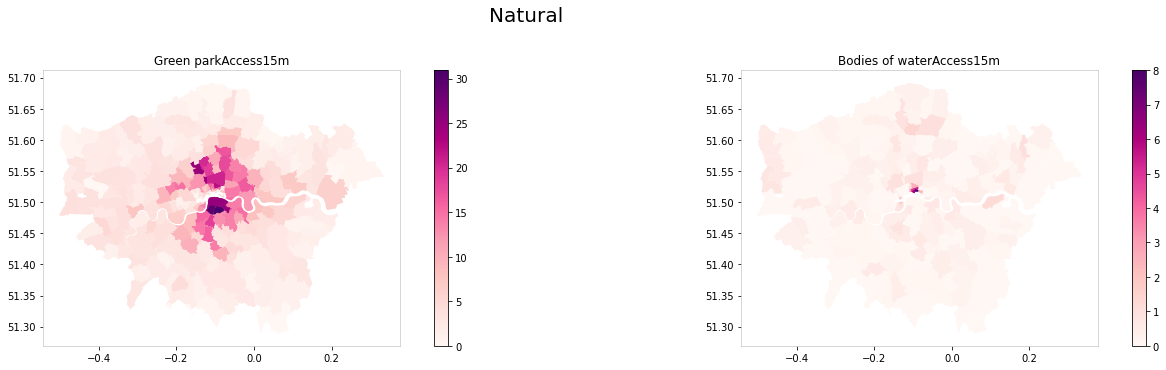

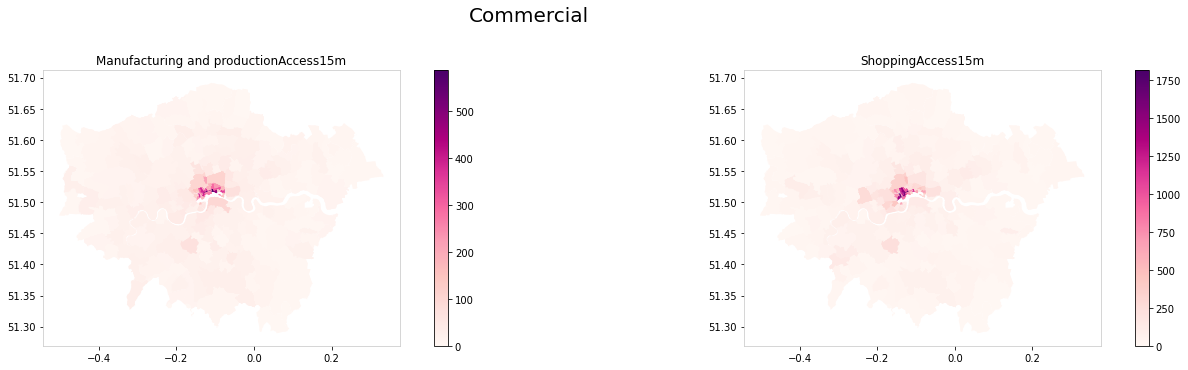

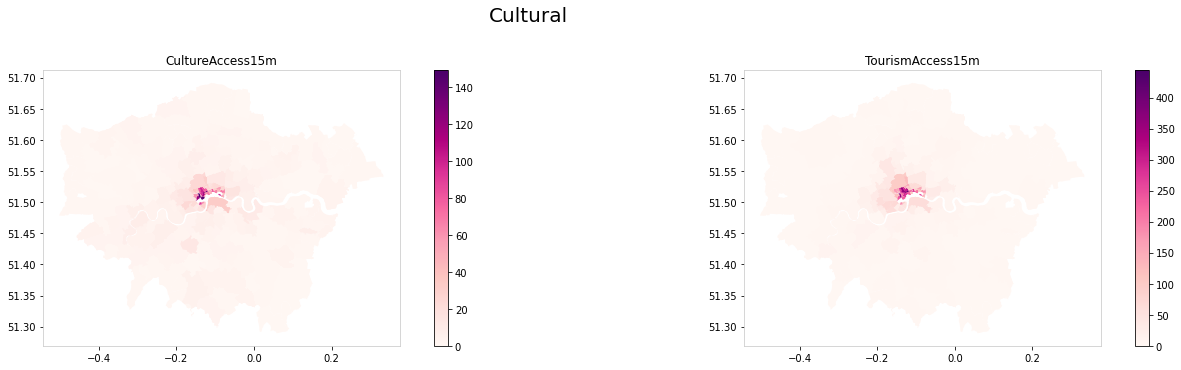

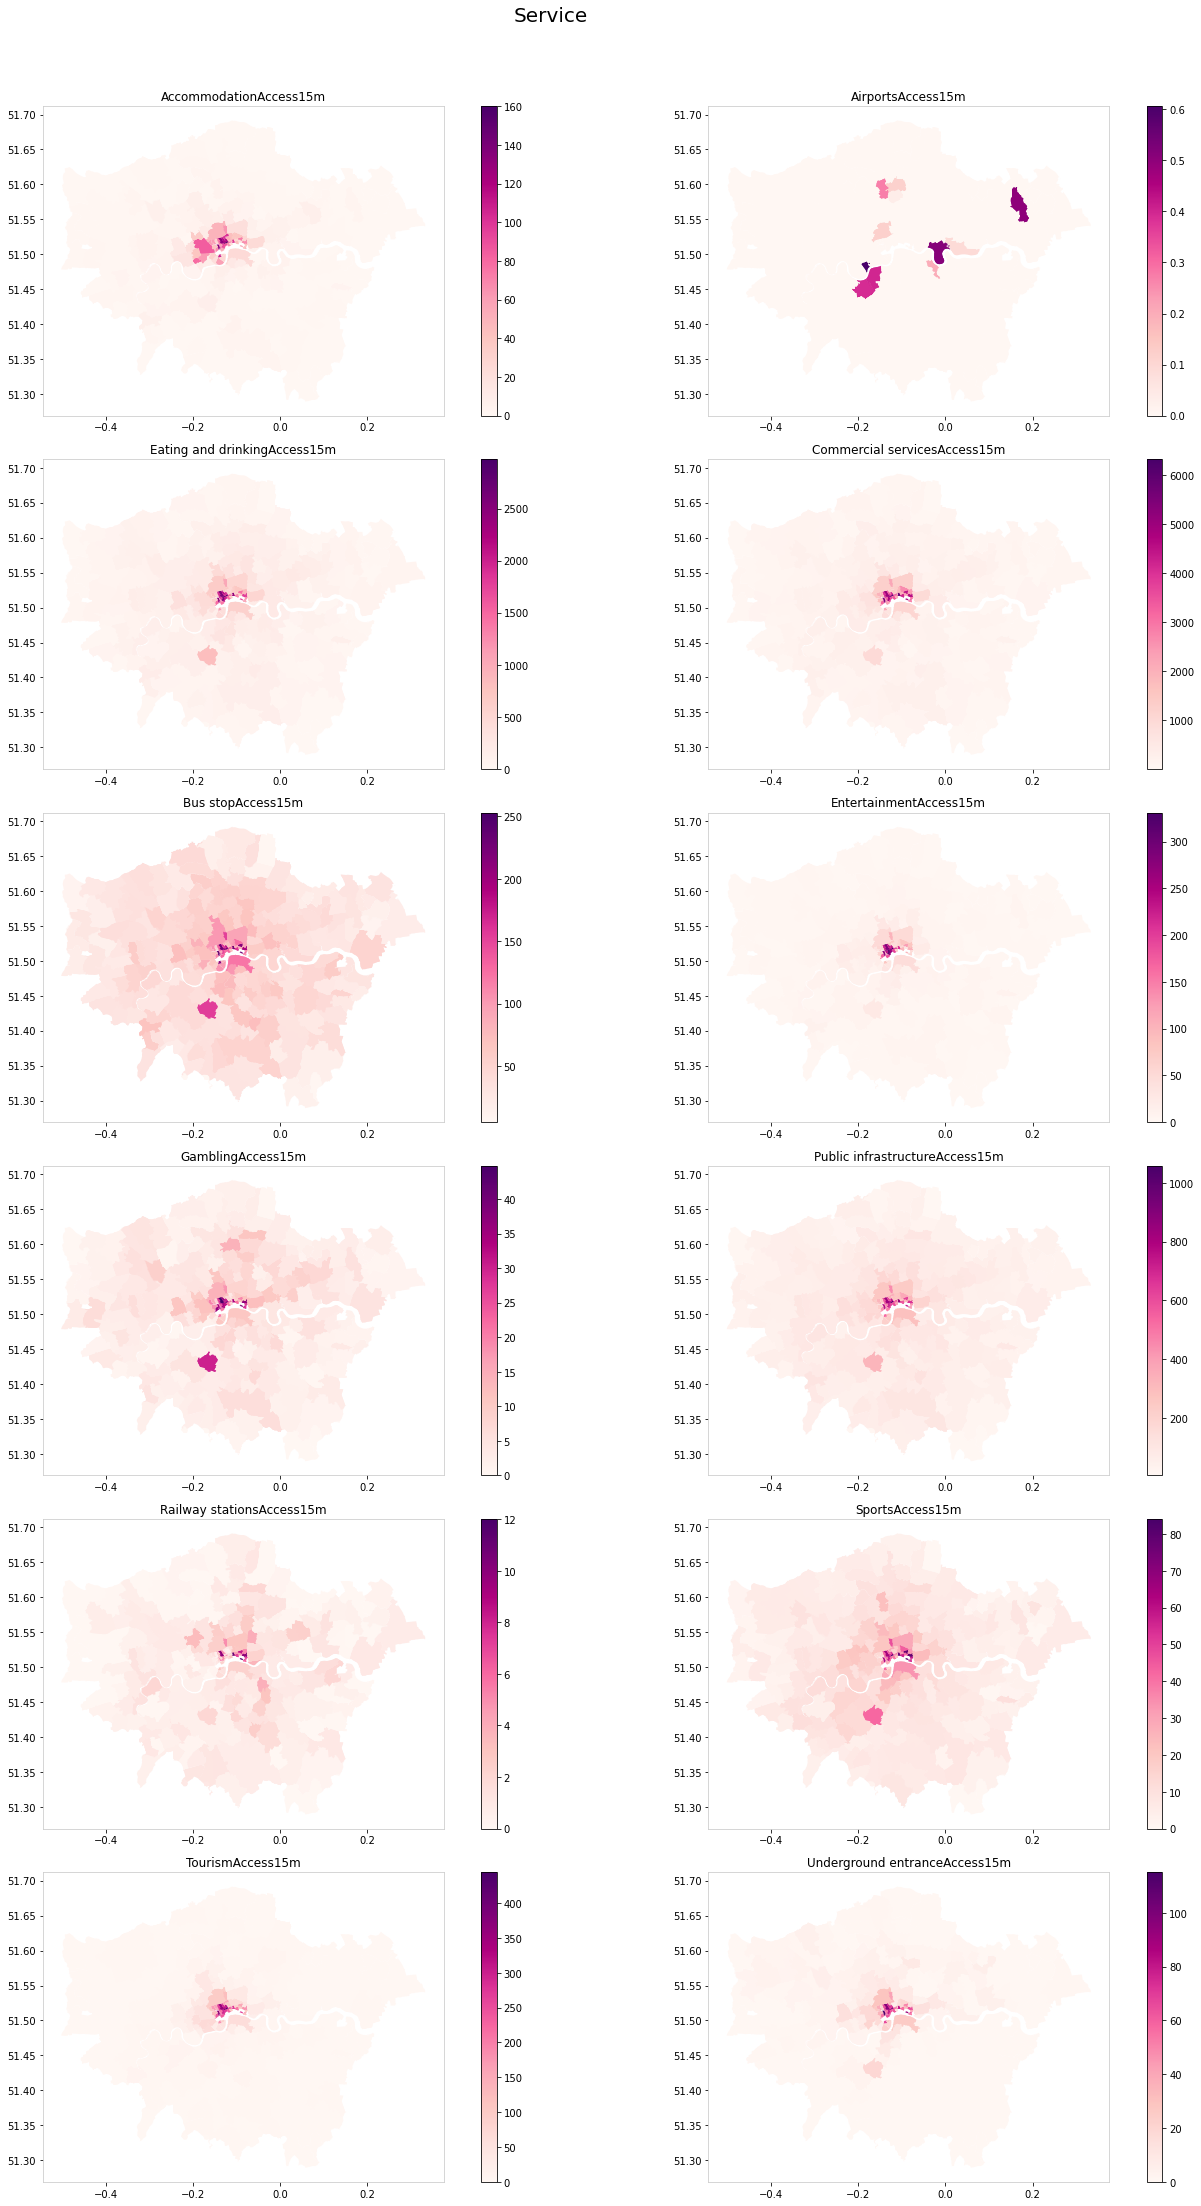

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

clipped_postcodes = gpd.read_file(r"D:\s-casa毕业论文-工程\shp文件\clipped_postcodes.shp")
london_boundary = gpd.read_file(r"D:\s-casa毕业论文-工程\shp文件\london_boundary.shp")
df = pd.read_csv(r"D:\POI data\729_acc\729reclass3_add_post_byShp.csv")

# 创建一个由Point对象组成的列
geometry = [Point(xy) for xy in zip(df.lon, df.lat)]

# 转换DataFrame为GeoDataFrame
geo_df = gpd.GeoDataFrame(df, geometry=geometry)
columns_to_drop = ['address', 'borough', 'postcode', 'property_type', 'tenure', 'geometry']  # 请将 'column1', 'column2', 'column3' 替换为你实际的列名

# 删除这些列
grouped_geo_df = geo_df.drop(columns=columns_to_drop)

# 现在，你可以使用 'PostDist' 列进行分组，并求每列的平均值
grouped_geo_df = grouped_geo_df.groupby('PostDist').mean()

# 合并 clipped_postcodes 和 grouped_geo_df
postcode_merge_price = clipped_postcodes.merge(grouped_geo_df, on='PostDist')


categories = {
    'Education': ['EducationAccess15m'],
    'Health': ['HealthAccess15m'],
    'Natural': ['Green parkAccess15m','Bodies of waterAccess15m'],
    'Commercial': ['Manufacturing and productionAccess15m', 'ShoppingAccess15m'],
    'Cultural': ['CultureAccess15m', 'TourismAccess15m'],
    'Service': ['AccommodationAccess15m', 'AirportsAccess15m', 'Eating and drinkingAccess15m', 
                'Commercial servicesAccess15m', 'Bus stopAccess15m', 'EntertainmentAccess15m', 'GamblingAccess15m', 
                'Public infrastructureAccess15m', 'Railway stationsAccess15m', 'SportsAccess15m', 'TourismAccess15m', 
                'Underground entranceAccess15m']
}
for category, columns in categories.items():
    # 创建subplot的布局
    rows = (len(columns) + 1) // 2  # 为了每行最多2个子图
    fig, axs = plt.subplots(rows, 2, figsize=(20, 5 * rows))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    fig.suptitle(category, fontsize=20, y=1.02)
    
    # 为每个 'Access15m' 列绘制子图
    for ax, col in zip(axs.ravel(), columns):
        postcode_merge_price.plot(column=col, ax=ax, legend=True, cmap='RdPu', linewidth=0.8)
        ax.set_title(col)
        plt.setp(ax.spines.values(), color='0.8')
    
    # 隐藏剩余的子图（如果有）
    for ax in axs.ravel()[len(columns):]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()


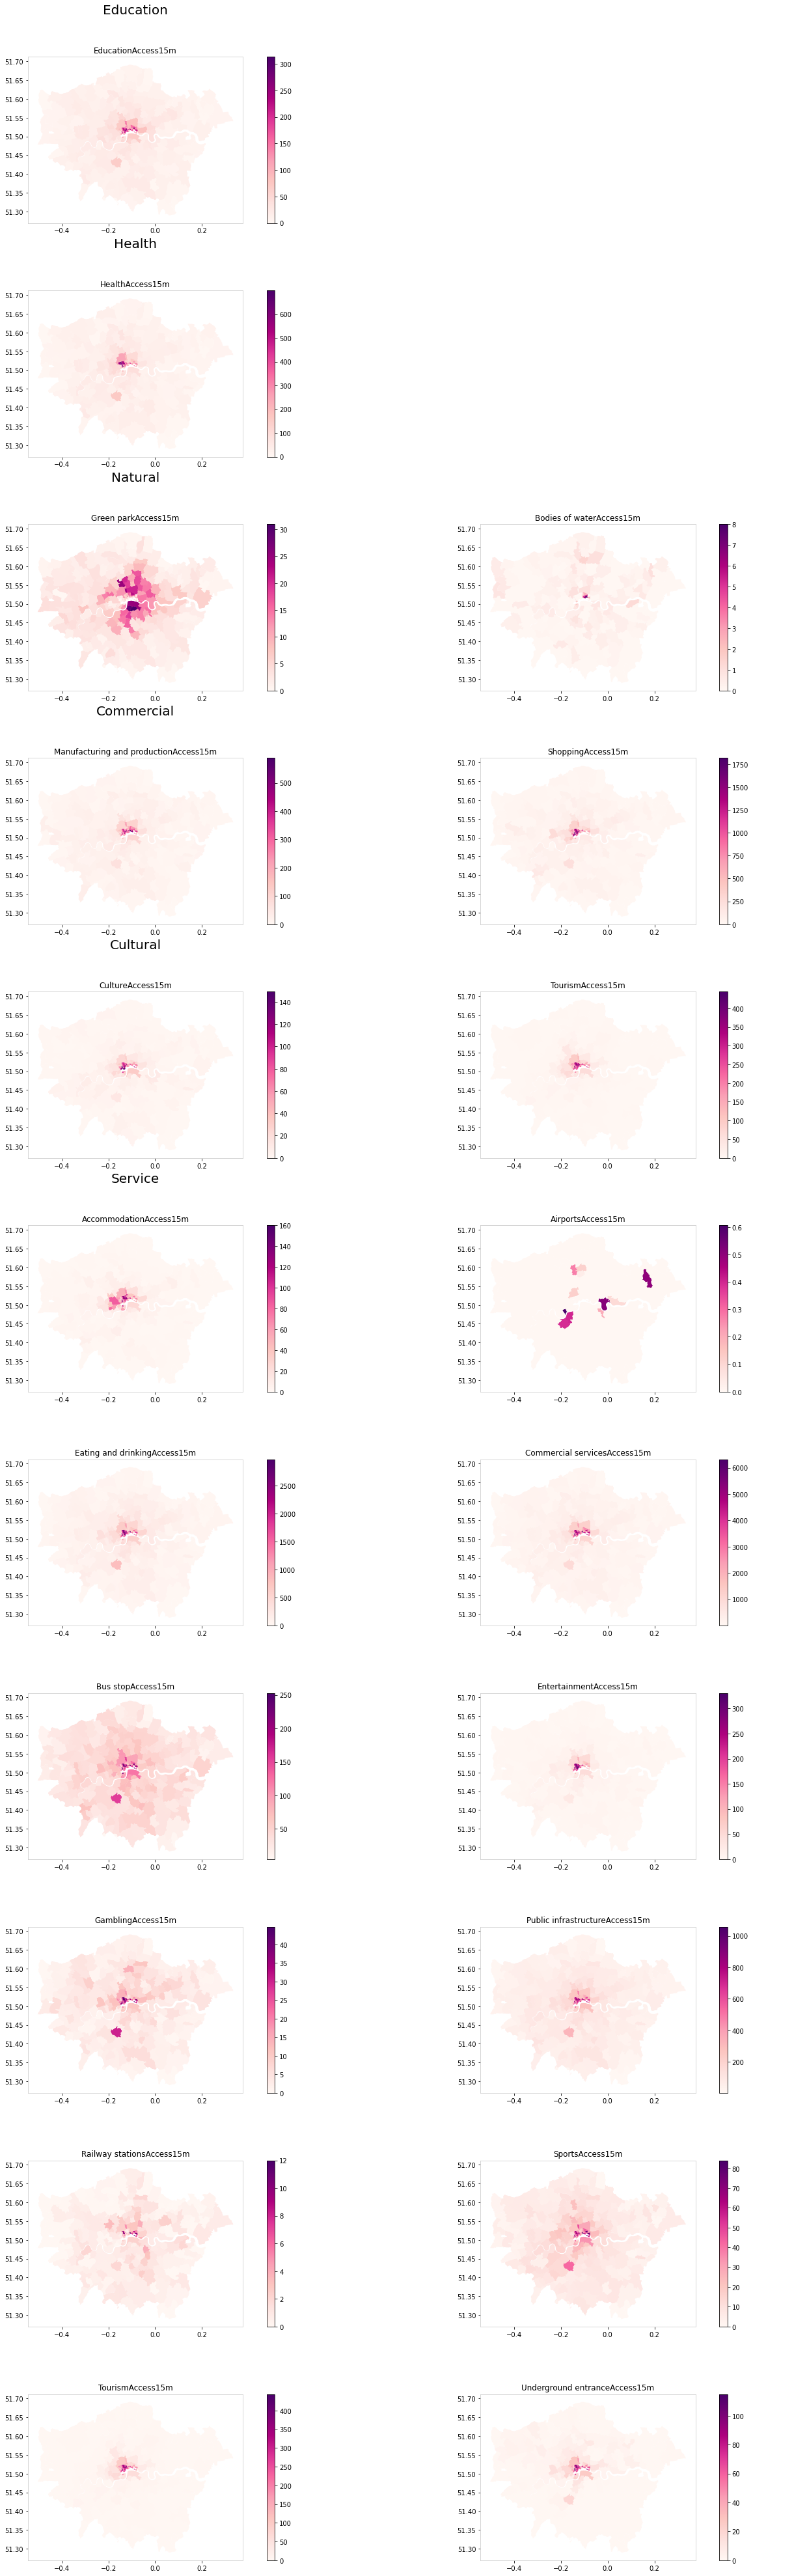

In [2]:
import numpy as np

# 首先，计算所有的子图总数，确定大图所需的行数
total_rows = sum((len(cols) + 1) // 2 for cols in categories.values())

# 创建大图
fig, axs = plt.subplots(total_rows, 2, figsize=(20, 5 * total_rows))
current_row = 0

for category, columns in categories.items():
    rows_for_this_category = (len(columns) + 1) // 2

    for idx, col in enumerate(columns):
        ax = axs[current_row + idx // 2, idx % 2]
        postcode_merge_price.plot(column=col, ax=ax, legend=True, cmap='RdPu', linewidth=0.8)
        ax.set_title(col)
        plt.setp(ax.spines.values(), color='0.8')

    # 添加分类标题
    axs[current_row, 0].annotate(category, 
                                xy=(0.5, 1.2), 
                                xycoords='axes fraction', 
                                fontsize=20, 
                                xytext=(0, 15),
                                textcoords='offset points',
                                ha='center', 
                                va='baseline')

    # 隐藏剩余的子图（如果有）
    for idx in range(len(columns), 2):
        axs[current_row + idx // 2, idx % 2].axis('off')

    current_row += rows_for_this_category

plt.tight_layout()
plt.savefig("all_in_one_figure.png")  # 保存大图
plt.show()
